<a href="https://colab.research.google.com/github/KGzB/CAS-Applied-Data-Science/blob/master/Module-2/CAS-D4-StatisticsSummary.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Import modules we may need**

In [22]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy import stats

**Create the datasets and try to understand the data**

In [23]:
data = pd.read_csv('multiple_datasets.csv', sep=",")
correlation_data = data[['id', 'loc_var', 'tAI', 'ARE', 'hl', 'TPU.length']]
correlation_data
mapping = {'Neurites': 1, 'Soma': 2, 'Not significant': 3}
correlation_data.loc[:, 'loc_var_numeric'] = correlation_data['loc_var'].map(mapping)
output_file_path = "multiple_datasets_with_mapping.csv"
correlation_data.to_csv(output_file_path, index=False)
output_file_path


C:\Users\moata\AppData\Local\Temp\ipykernel_6512\2794871457.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  correlation_data.loc[:, 'loc_var_numeric'] = correlation_data['loc_var'].map(mapping)


'multiple_datasets_with_mapping.csv'

In [30]:
# Manually map 'loc_var' to numeric values
correlation_data = data[['id', 'loc_var', 'tAI', 'ARE', 'hl', 'TPU.length', 'm6a.cons.enrich']]
mapping = {'Neurites': 1, 'Soma': 2, 'Not significant': 3}
mapping_m6a = {'Not significant': 0, 'm6A depleted': 1, 'm6A enriched': 2}

# Convert 'loc_var' to categorical numeric values

# Apply the mapping using .loc to avoid the SettingWithCopyWarning
correlation_data.loc[:, 'loc_var_numeric'] = correlation_data['loc_var'].map(mapping)
correlation_data.loc[:, 'm6A_depleted'] = correlation_data['m6a.cons.enrich'].map(mapping_m6a)

# Now calculate the correlations across all datasets (including the numeric 'loc_var')
#correlations = correlation_data.groupby('id').corr()

# Display the correlations
output_file_path = "multiple_datasets_with_mapping.csv"
correlation_data.to_csv(output_file_path, index=False)
output_file_path


C:\Users\moata\AppData\Local\Temp\ipykernel_6512\2133182941.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  correlation_data.loc[:, 'loc_var_numeric'] = correlation_data['loc_var'].map(mapping)
C:\Users\moata\AppData\Local\Temp\ipykernel_6512\2133182941.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  correlation_data.loc[:, 'm6A_depleted'] = correlation_data['m6a.cons.enrich'].map(mapping_m6a)


'multiple_datasets_with_mapping.csv'

In [31]:
data_with_mapping = pd.read_csv('multiple_datasets_with_mapping.csv', sep=",")

# Filter the relevant columns for the analysis
correlation_data = data_with_mapping[['id', 'loc_var_numeric', 'tAI', 'ARE', 'hl', 'TPU.length', 'm6A_depleted']]
correlation_data


,id,loc_var_numeric,tAI,ARE,hl,TPU.length,m6A_depleted
0,1,3,0.199523,6,3.114353,2037,0
1,1,3,0.196281,1,NaN,127,0
2,1,3,0.186766,15,NaN,1640,0
3,1,3,0.208428,4,3.473583,2934,0
4,1,3,0.196132,5,NaN,2068,0
...,...,...,...,...,...,...,...
135717,13,3,0.212954,0,NaN,124,1
135718,13,3,0.202715,3,5.147829,1071,1
135719,13,3,0.206155,0,NaN,554,0
135720,13,3,0.191721,4,2.574285,1280,0


In [8]:

# Now calculate the correlations across all datasets (including the numeric 'loc_var')
correlations = correlation_data.groupby('id').corr()

# Display the correlations
print(correlations)



                    loc_var_numeric       tAI       ARE        hl  TPU.length
id                                                                           
1  loc_var_numeric         1.000000 -0.115359  0.072018 -0.317899    0.012578
   tAI                    -0.115359  1.000000 -0.200238  0.187841   -0.098262
   ARE                     0.072018 -0.200238  1.000000 -0.177704    0.746552
   hl                     -0.317899  0.187841 -0.177704  1.000000   -0.157051
   TPU.length              0.012578 -0.098262  0.746552 -0.157051    1.000000
...                             ...       ...       ...       ...         ...
13 loc_var_numeric         1.000000 -0.122583  0.015590 -0.321604   -0.011979
   tAI                    -0.122583  1.000000 -0.190836  0.187804   -0.092567
   ARE                     0.015590 -0.190836  1.000000 -0.177209    0.747319
   hl                     -0.321604  0.187804 -0.177209  1.000000   -0.156963
   TPU.length             -0.011979 -0.092567  0.747319 -0.15696

In [9]:

# Display the correlation results
correlations.to_csv("correlations_by_dataset.csv", index=True)

In [11]:

# Correlating dependent variables
dependent_vars_correlation = data[['id', 'tAI', 'ARE', 'hl', 'TPU.length']]

# Now calculate the correlations among dependent variables across all datasets
dependent_correlations = dependent_vars_correlation.groupby('id').corr()
# Display the pairwise correlation results among dependent variables
#dependent_correlations.to_csv("dependent_correlations.csv", index=True)


**Hypothesis 0: Are there any normally distributed parameter**

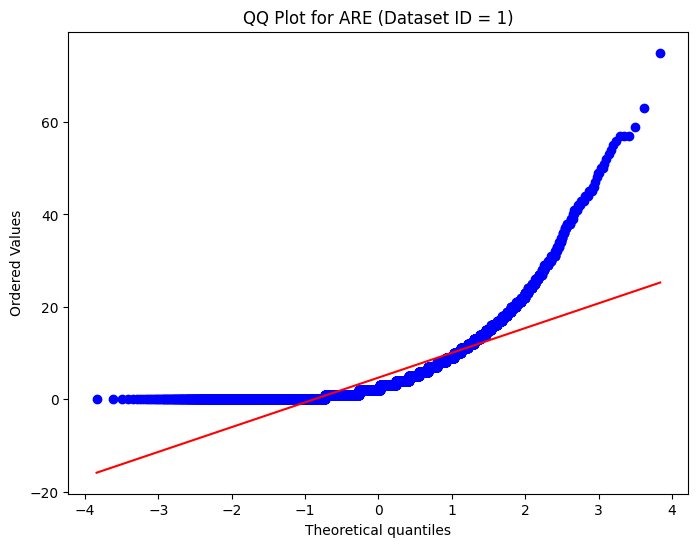

C:\Users\moata\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\scipy\stats\_axis_nan_policy.py:573: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 11318.
  res = hypotest_fun_out(*samples, **kwds)


ShapiroResult(statistic=np.float64(0.7086969202191438), pvalue=np.float64(6.992851350513144e-88))

In [12]:
import scipy.stats as stats
import matplotlib.pyplot as plt

# Let's work with dataset 1 for simplicity
are_data = data[data['id'] == 1]['ARE'].dropna()

# Generate a QQ plot for the 'ARE' variable to test normality
plt.figure(figsize=(8, 6))
stats.probplot(are_data, dist="norm", plot=plt)
plt.title("QQ Plot for ARE (Dataset ID = 1)")
plt.show()

# Perform a Shapiro-Wilk test for normality
shapiro_test = stats.shapiro(are_data)
shapiro_test


In [13]:
# Import necessary libraries
from scipy.stats import spearmanr, mannwhitneyu, kruskal
import pandas as pd

# Spearman's Correlation: Let's calculate the correlation between ARE and TPU.length across all datasets
spearman_corr, spearman_p = spearmanr(data['ARE'], data['TPU.length'])

# Mann-Whitney U Test: Compare ARE between loc_var = 0 and loc_var = 1
group1 = data[data['loc_var'] == 'Not significant']['ARE'].dropna()
group2 = data[data['loc_var'] != 'Not significant']['ARE'].dropna()

mannwhitney_stat, mannwhitney_p = mannwhitneyu(group1, group2)

# Kruskal-Wallis Test: Compare ARE across different datasets (id values)
kruskal_stat, kruskal_p = kruskal(*[data[data['id'] == i]['ARE'].dropna() for i in range(1, 14)])

# Prepare and display the results
results = {
    "Spearman's Correlation (ARE vs TPU.length)": {"statistic": spearman_corr, "p-value": spearman_p},
    "Mann-Whitney U Test (ARE ~ loc_var)": {"statistic": mannwhitney_stat, "p-value": mannwhitney_p},
    "Kruskal-Wallis Test (ARE across datasets)": {"statistic": kruskal_stat, "p-value": kruskal_p}
}
results
#import ace_tools as tools; tools.display_dataframe_to_user(name="Statistical Test Results", dataframe=pd.DataFrame(results).T)


{"Spearman's Correlation (ARE vs TPU.length)": {'statistic': np.float64(0.7259779461538981),
  'p-value': np.float64(0.0)},
 'Mann-Whitney U Test (ARE ~ loc_var)': {'statistic': np.float64(1254669602.5),
  'p-value': np.float64(2.4352918735147024e-16)},
 'Kruskal-Wallis Test (ARE across datasets)': {'statistic': np.float64(202.1505916502829),
  'p-value': np.float64(1.1732855223365042e-36)}}

In [15]:
from scipy.stats import shapiro
# List of numeric variables to test for normality (excluding m6a.cons.enrich)
numeric_variables_to_test = ['hl', 'ARE', 'tAI', 'TPU.length']

# Run the Shapiro-Wilk test for each numeric variable
normality_results_numeric = {}
for var in numeric_variables_to_test:
    stat, p_value = shapiro(data[var].dropna())  # Drop NaN values for testing
    normality_results_numeric[var] = {'Shapiro-Wilk Statistic': stat, 'p-value': p_value}

# Convert the results to a DataFrame for better readability
normality_df_numeric = pd.DataFrame(normality_results_numeric).T

# Display the results
normality_df_numeric

C:\Users\moata\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\scipy\stats\_axis_nan_policy.py:573: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 107403.
  res = hypotest_fun_out(*samples, **kwds)
C:\Users\moata\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\scipy\stats\_axis_nan_policy.py:573: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 135722.
  res = hypotest_fun_out(*samples, **kwds)


,Shapiro-Wilk Statistic,p-value
hl,0.780319,1.167994e-136
ARE,0.706166,2.067109e-151
tAI,0.903164,5.702317e-118
TPU.length,0.805779,1.916980e-138


**Hypothesis 1: Location Affects mRNA Half-Life**

In [6]:
import matplotlib.pyplot as plt
from scipy.stats import shapiro

# Perform Shapiro-Wilk test for normality on half-life data for Soma and Neurites
soma_half_life = data[data['loc_var'] == 'Soma']['hl'].dropna()
neurites_half_life = data[data['loc_var'] == 'Neurites']['hl'].dropna()

# Shapiro-Wilk test for normality
soma_normality_test = shapiro(soma_half_life)
neurites_normality_test = shapiro(neurites_half_life)

# Display the results of the normality tests
soma_normality_test, neurites_normality_test


C:\Users\moata\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\scipy\stats\_axis_nan_policy.py:573: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 9697.
  res = hypotest_fun_out(*samples, **kwds)
C:\Users\moata\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\scipy\stats\_axis_nan_policy.py:573: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 10261.
  res = hypotest_fun_out(*samples, **kwds)


(ShapiroResult(statistic=np.float64(0.7629951326732523), pvalue=np.float64(1.499102298631977e-79)),
 ShapiroResult(statistic=np.float64(0.8112478217075866), pvalue=np.float64(6.752603681495015e-76)))

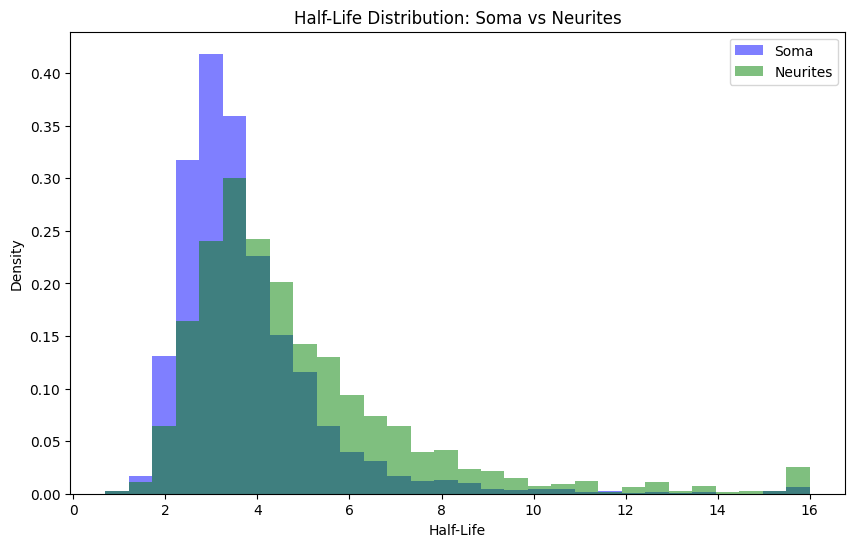

In [17]:

# Plot the distributions of half-lives for Soma and Neurites
plt.figure(figsize=(10, 6))

# Plotting the histograms
plt.hist(soma_half_life, bins=30, alpha=0.5, label='Soma', color='blue', density=True)
plt.hist(neurites_half_life, bins=30, alpha=0.5, label='Neurites', color='green', density=True)

# Add labels and title
plt.title('Half-Life Distribution: Soma vs Neurites')
plt.xlabel('Half-Life')
plt.ylabel('Density')
plt.legend()

# Show the plot
plt.show()

In [8]:
from scipy.stats import mannwhitneyu

soma_half_life = data[data['loc_var'] == 'Soma']['hl'].dropna()  # Half-lives for Soma
neurites_half_life = data[data['loc_var'] == 'Neurites']['hl'].dropna()  # Half-lives for Neurites

# Perform the Mann-Whitney U test
mannwhitney_stat, mannwhitney_p = mannwhitneyu(soma_half_life, neurites_half_life)

# Display the Mann-Whitney U test result
print(f"Mann-Whitney U Statistic: {mannwhitney_stat}")
print(f"p-value: {mannwhitney_p}")

# Calculate Median Half-Life for Each Group
median_soma = soma_half_life.median()
median_neurites = neurites_half_life.median()

# Display the medians
print(f"Median half-life for Soma: {median_soma}")
print(f"Median half-life for Neurites: {median_neurites}")

# Interpret the direction and correlation of the difference
if median_soma > median_neurites:
    print("Soma has longer half-lives and correlates positively with mRNA stability. Neurites have shorter half-lives and correlate negatively with mRNA stability.")
elif median_soma < median_neurites:
    print("Soma has shorter half-lives and correlates negatively with mRNA stability. Neurites have longer half-lives and correlate positively with mRNA stability.")
else:
    print("Soma and Neurites have similar half-lives, indicating no significant difference in correlation with mRNA stability.")


Mann-Whitney U Statistic: 34089185.0
p-value: 0.0
Median half-life for Soma: 3.360247491
Median half-life for Neurites: 4.157574238
Soma has shorter half-lives and correlates negatively with mRNA stability. Neurites have longer half-lives and correlate positively with mRNA stability.


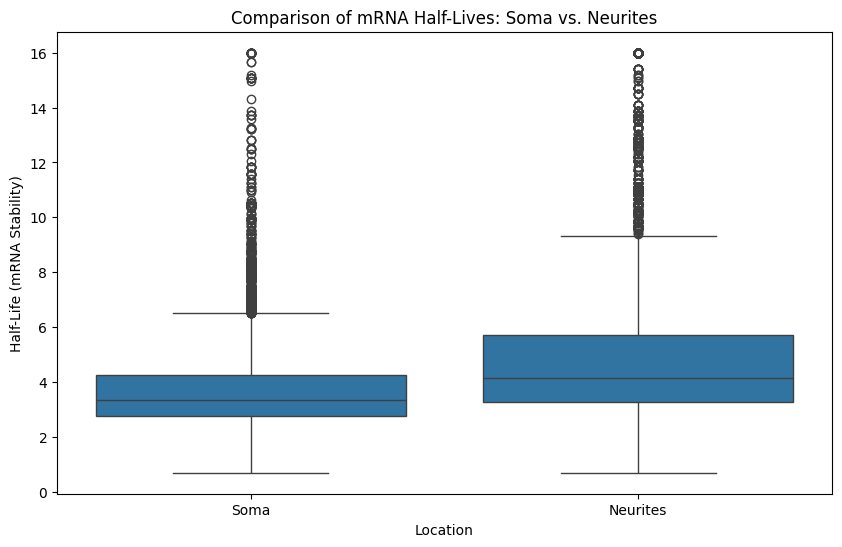

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Assuming the data for Soma and Neurites half-lives is already extracted
# Create a new DataFrame for plotting
plot_data = pd.DataFrame({
    'Half-Life': pd.concat([soma_half_life, neurites_half_life]),
    'Location': ['Soma'] * len(soma_half_life) + ['Neurites'] * len(neurites_half_life)
})

# Create a boxplot to visualize the half-life distributions
plt.figure(figsize=(10, 6))
sns.boxplot(x='Location', y='Half-Life', data=plot_data)
plt.title('Comparison of mRNA Half-Lives: Soma vs. Neurites')
plt.xlabel('Location')
plt.ylabel('Half-Life (mRNA Stability)')
plt.show()


**Hypothesis 2: ARE Presence Affects mRNA Half-Life**

In [11]:
# Filter data for genes with and without ARE elements
genes_with_ares = data[data['ARE'] > 0]['hl'].dropna()  # Genes with AREs
genes_without_ares = data[data['ARE'] == 0]['hl'].dropna()  # Genes without AREs

# Perform the Mann-Whitney U test to compare half-lives between genes with and without AREs
mannwhitney_stat_ares, mannwhitney_p_ares = mannwhitneyu(genes_with_ares, genes_without_ares)

# Display the Mann-Whitney U test result
print(f"Mann-Whitney U Statistic: {mannwhitney_stat_ares}")
print(f"p-value: {mannwhitney_p_ares}")

# Calculate Median Half-Life for Each Group
median_with_ares = genes_with_ares.median()
median_without_ares = genes_without_ares.median()

# Display the medians
print(f"Median half-life for genes with AREs: {median_with_ares}")
print(f"Median half-life for genes without AREs: {median_without_ares}")

# Interpret the direction and correlation of the difference
if median_with_ares > median_without_ares:
    print("Genes with AREs have longer half-lives and correlate positively with mRNA stability. "
          "Genes without AREs have shorter half-lives and correlate negatively with mRNA stability.")
elif median_with_ares < median_without_ares:
    print("Genes with AREs have shorter half-lives and correlate negatively with mRNA stability. "
          "Genes without AREs have longer half-lives and correlate positively with mRNA stability.")
else:
    print("Genes with and without AREs have similar half-lives, indicating no significant difference in correlation with mRNA stability.")



Mann-Whitney U Statistic: 686246684.0
p-value: 0.0
Median half-life for genes with AREs: 3.266750042
Median half-life for genes without AREs: 3.8891600215
Genes with AREs have shorter half-lives and correlate negatively with mRNA stability. Genes without AREs have longer half-lives and correlate positively with mRNA stability.


**Hypothesis 3: Combined Effects of ARE, m6A, and tAI on Half-Life**

In [20]:
import statsmodels.api as sm

# Prepare the data for regression analysis
# Drop rows with missing values in the relevant columns
regression_data = data[['hl', 'ARE', 'm6a.cons.enrich', 'tAI']].dropna()

# Convert categorical m6A data to numerical (e.g., 0 for 'Not significant', 
# 1 for 'm6A depleted', 2 for 'm6A enriched')
regression_data['m6a_numeric'] = regression_data['m6a.cons.enrich'].map({
    'Not significant': 0,
    'm6A depleted': 1,
    'm6A enriched': 2
})

# Define the dependent (y) and independent variables (X)
X = regression_data[['ARE', 'm6a_numeric', 'tAI']]
y = regression_data['hl']

# Add a constant to the independent variables
X = sm.add_constant(X)

# Fit the multiple linear regression model
model = sm.OLS(y, X).fit()

# Display the regression summary
model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     hl   R-squared:                       0.059
Model:                            OLS   Adj. R-squared:                  0.059
Method:                 Least Squares   F-statistic:                     2258.
Date:                Fri, 13 Sep 2024   Prob (F-statistic):               0.00
Time:                        09:25:49   Log-Likelihood:            -2.0648e+05
No. Observations:              107403   AIC:                         4.130e+05
Df Residuals:                  107399   BIC:                         4.130e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           1.1323      0.071     15.917      0.000       0.993       1.272
ARE            -0.0413      0.001    -52.876      0.000      -0.043      -0.040
m6a_numeric    -0.2196      0.006    -33.999      0.000      -0.232      -0.207
tAI            14.6276      0.346     42.250      0.000      13.949      15.306
==============================================================================
Omnibus:                    66907.517   Durbin-Watson:                   1.938
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           962499.379
Skew:                           2.788   Prob(JB):                         0.00
Kurtosis:                      16.564   Cond. No.                         582.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

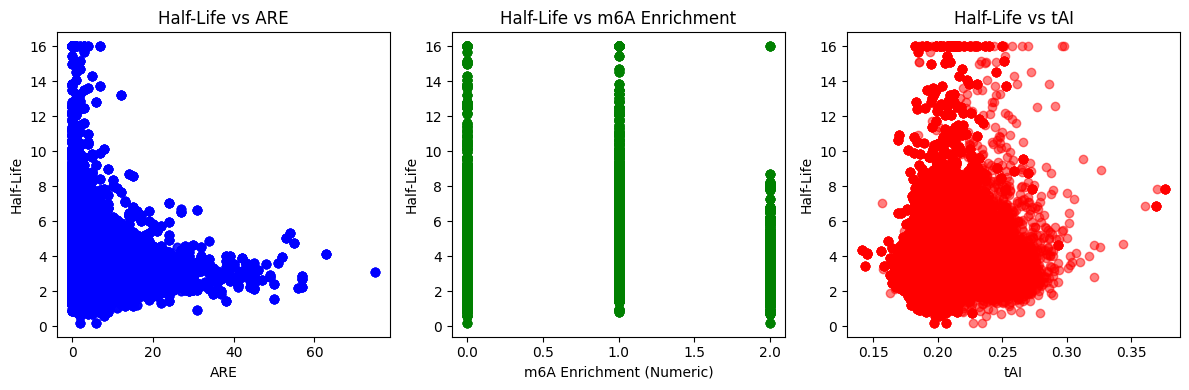

In [30]:
# Create scatter plots to visualize the relationships between half-life and the other variables
cleaned_regression_data = regression_data[['hl', 'ARE', 'm6a_numeric', 'tAI']].dropna()
plt.figure(figsize=(12, 4))
# Plot 1: Half-life vs ARE
plt.subplot(1, 3, 1)
plt.scatter(cleaned_regression_data['ARE'], cleaned_regression_data['hl'], alpha=0.5, color='blue')
plt.title('Half-Life vs ARE')
plt.xlabel('ARE')
plt.ylabel('Half-Life')
# Plot 2: Half-life vs m6A Enrichment
plt.subplot(1, 3, 2)
plt.scatter(cleaned_regression_data['m6a_numeric'], cleaned_regression_data['hl'], alpha=0.5, color='green')
plt.title('Half-Life vs m6A Enrichment')
plt.xlabel('m6A Enrichment (Numeric)')
plt.ylabel('Half-Life')
# Plot 3: Half-life vs tAI
plt.subplot(1, 3, 3)
plt.scatter(cleaned_regression_data['tAI'], cleaned_regression_data['hl'], alpha=0.5, color='red')
plt.title('Half-Life vs tAI')
plt.xlabel('tAI')
plt.ylabel('Half-Life')
# Display the plots
plt.tight_layout()
plt.show()


**Hypothesis 4: Combined Effects of ARE , tAI, and TPU length**

In [22]:
# Prepare the data for regression analysis including TPU length
# Drop rows with missing values in the relevant columns
regression_data_tpu = data[['hl', 'ARE', 'tAI', 'TPU.length']].dropna()

# Define the dependent (y) and independent variables (X)
X_regression_tpu = regression_data_tpu[['ARE', 'tAI', 'TPU.length']]
y_regression_tpu = regression_data_tpu['hl']

# Add a constant to the independent variables
X_regression_tpu = sm.add_constant(X_regression_tpu)

# Fit the multiple linear regression model
model_tpu = sm.OLS(y_regression_tpu, X_regression_tpu).fit()

# Display the regression summary
model_tpu.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     hl   R-squared:                       0.051
Model:                            OLS   Adj. R-squared:                  0.051
Method:                 Least Squares   F-statistic:                     1937.
Date:                Fri, 13 Sep 2024   Prob (F-statistic):               0.00
Time:                        09:26:09   Log-Likelihood:            -2.0693e+05
No. Observations:              107403   AIC:                         4.139e+05
Df Residuals:                  107399   BIC:                         4.139e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.9546      0.071     13.394      0.000       0.815       1.094
ARE           -0.0275      0.001    -23.340      0.000      -0.030      -0.025
tAI           15.1236      0.348     43.418      0.000      14.441      15.806
TPU.length -6.818e-05    4.4e-06    -15.479      0.000   -7.68e-05   -5.95e-05
==============================================================================
Omnibus:                    65528.321   Durbin-Watson:                   1.933
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           910942.164
Skew:                           2.721   Prob(JB):                         0.00
Kurtosis:                      16.189   Cond. No.                     1.78e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.78e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [23]:
# Prepare data for ANOVA to test if half-life varies across soma and neurites, 
# controlling for tAI and TPU length
anova_data = data[['hl', 'loc_var', 'tAI', 'TPU.length']].dropna()

# Convert 'loc_var' to categorical numeric values (e.g., 0 for soma, 1 for neurites)
anova_data['loc_numeric'] = anova_data['loc_var'].map({
    'Soma': 0,
    'Neurites': 1
})

# Remove rows with missing values in the independent variables for ANOVA
anova_data_clean = anova_data.dropna()

# Define the dependent variable (half-life) and independent variables 
# (loc_var, tAI, TPU length) for the clean data
X_anova_clean = anova_data_clean[['loc_numeric', 'tAI', 'TPU.length']]
y_anova_clean = anova_data_clean['hl']

# Add a constant to the independent variables
X_anova_clean = sm.add_constant(X_anova_clean)

# Perform ANOVA by fitting an OLS regression model on the clean data
model_anova_clean = sm.OLS(y_anova_clean, X_anova_clean).fit()

# Display the ANOVA summary
model_anova_clean.summary()



<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     hl   R-squared:                       0.142
Model:                            OLS   Adj. R-squared:                  0.142
Method:                 Least Squares   F-statistic:                     1098.
Date:                Fri, 13 Sep 2024   Prob (F-statistic):               0.00
Time:                        09:26:14   Log-Likelihood:                -42732.
No. Observations:               19958   AIC:                         8.547e+04
Df Residuals:                   19954   BIC:                         8.550e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          -1.9614      0.215     -9.120      0.000      -2.383      -1.540
loc_numeric     0.7738      0.030     25.638      0.000       0.715       0.833
tAI            31.4113      1.067     29.441      0.000      29.320      33.503
TPU.length     -0.0002   8.05e-06    -28.699      0.000      -0.000      -0.000
==============================================================================
Omnibus:                     9764.108   Durbin-Watson:                   1.921
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            69900.895
Skew:                           2.256   Prob(JB):                         0.00
Kurtosis:                      10.982   Cond. No.                     1.99e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.99e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

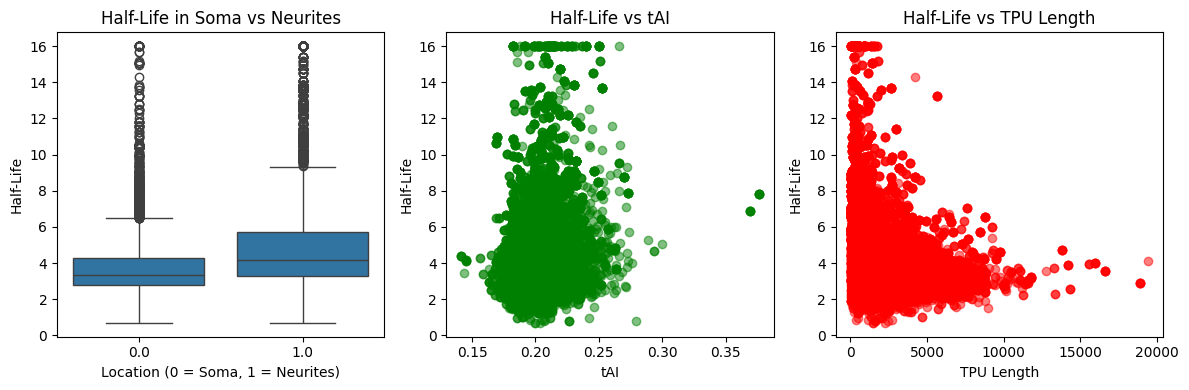

In [31]:
import seaborn as sns
# Create a figure for visualizing the relationships in ANOVA results
plt.figure(figsize=(12, 4))

# Plot 1: Boxplot of half-lives in Soma vs Neurites
plt.subplot(1, 3, 1)
sns.boxplot(x=anova_data_clean['loc_numeric'], y=anova_data_clean['hl'])
plt.title('Half-Life in Soma vs Neurites')
plt.xlabel('Location (0 = Soma, 1 = Neurites)')
plt.ylabel('Half-Life')

# Plot 2: Half-life vs tAI
plt.subplot(1, 3, 2)
plt.scatter(anova_data_clean['tAI'], anova_data_clean['hl'], alpha=0.5, color='green')
plt.title('Half-Life vs tAI')
plt.xlabel('tAI')
plt.ylabel('Half-Life')

# Plot 3: Half-life vs TPU length
plt.subplot(1, 3, 3)
plt.scatter(anova_data_clean['TPU.length'], anova_data_clean['hl'], alpha=0.5, color='red')
plt.title('Half-Life vs TPU Length')
plt.xlabel('TPU Length')
plt.ylabel('Half-Life')

# Show the plots
plt.tight_layout()
plt.show()


**Hypothesis 5: Combined Effects of ARE , tAI, TPU length, m6A**

In [33]:
anova_data_full = data[['hl', 'loc_var', 'tAI', 'TPU.length', 'm6a.cons.enrich']].dropna()

# Convert 'loc_var' to categorical numeric values
anova_data_full['loc_numeric'] = anova_data_full['loc_var'].map({
    'Soma': 0,
    'Neurites': 1
})

# Convert m6A consensus enrichment to numeric categories
anova_data_full['m6a_numeric'] = anova_data_full['m6a.cons.enrich'].map({
    'Not significant': 0,
    'm6A depleted': 1,
    'm6A enriched': 2
})

# Remove rows with missing values in the relevant columns
anova_data_full_clean = anova_data_full.dropna()

# Prepare data for ANOVA including m6A, tAI, TPU length, and location
X_anova_full_clean = anova_data_full_clean[['loc_numeric', 'tAI', 'TPU.length', 'm6a_numeric']]
y_anova_full_clean = anova_data_full_clean['hl']

# Add a constant to the independent variables
X_anova_full_clean = sm.add_constant(X_anova_full_clean)

# Perform ANOVA by fitting an OLS regression model including m6A
model_anova_full_clean = sm.OLS(y_anova_full_clean, X_anova_full_clean).fit()

# Display the ANOVA summary
model_anova_full_clean.summary()



<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     hl   R-squared:                       0.145
Model:                            OLS   Adj. R-squared:                  0.144
Method:                 Least Squares   F-statistic:                     842.8
Date:                Fri, 13 Sep 2024   Prob (F-statistic):               0.00
Time:                        09:54:23   Log-Likelihood:                -42700.
No. Observations:               19958   AIC:                         8.541e+04
Df Residuals:                   19953   BIC:                         8.545e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          -1.8099      0.216     -8.397      0.000      -2.232      -1.387
loc_numeric     0.7637      0.030     25.323      0.000       0.705       0.823
tAI            31.1998      1.066     29.281      0.000      29.111      33.288
TPU.length     -0.0002   8.06e-06    -29.185      0.000      -0.000      -0.000
m6a_numeric    -0.1589      0.020     -8.064      0.000      -0.198      -0.120
==============================================================================
Omnibus:                     9846.966   Durbin-Watson:                   1.922
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            71276.311
Skew:                           2.275   Prob(JB):                         0.00
Kurtosis:                      11.062   Cond. No.                     1.99e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.99e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [16]:
# Import the necessary function for the Kruskal-Wallis test
from scipy.stats import kruskal
# Now, clean and preprocess the data for ARE, tAI, TPU length, and half-life (hl) for the Kruskal-Wallis test
cleaned_data = data[['ARE', 'tAI', 'TPU.length', 'hl']].dropna()

# Group by ARE presence (binary: 0 for no ARE, 1 for presence of AREs)
hl_with_ares = cleaned_data[cleaned_data['ARE'] > 0]['hl'].astype(float)
hl_without_ares = cleaned_data[cleaned_data['ARE'] == 0]['hl'].astype(float)

# Group by tAI (high vs low based on median)
hl_tai_high = cleaned_data[cleaned_data['tAI'] > cleaned_data['tAI'].median()]['hl'].astype(float)
hl_tai_low = cleaned_data[cleaned_data['tAI'] <= cleaned_data['tAI'].median()]['hl'].astype(float)

# Group by TPU length (high vs low based on median)
hl_tpu_high = cleaned_data[cleaned_data['TPU.length'] > cleaned_data['TPU.length'].median()]['hl'].astype(float)
hl_tpu_low = cleaned_data[cleaned_data['TPU.length'] <= cleaned_data['TPU.length'].median()]['hl'].astype(float)

# Perform the Kruskal-Wallis test separately for ARE, tAI, and TPU length
kruskal_stat_ares, kruskal_p_ares = kruskal(hl_with_ares, hl_without_ares)
kruskal_stat_tai, kruskal_p_tai = kruskal(hl_tai_high, hl_tai_low)
kruskal_stat_tpu, kruskal_p_tpu = kruskal(hl_tpu_high, hl_tpu_low)

# Perform the Kruskal-Wallis test for the combined groups
kruskal_stat_combined, kruskal_p_combined = kruskal(
    hl_with_ares, hl_without_ares, 
    hl_tai_high, hl_tai_low, 
    hl_tpu_high, hl_tpu_low
)

# Output the results for all tests
kruskal_results = {
    "Kruskal-Wallis for ARE": (kruskal_stat_ares, kruskal_p_ares),
    "Kruskal-Wallis for tAI": (kruskal_stat_tai, kruskal_p_tai),
    "Kruskal-Wallis for TPU Length": (kruskal_stat_tpu, kruskal_p_tpu),
    "Kruskal-Wallis for Combined ARE, tAI, TPU": (kruskal_stat_combined, kruskal_p_combined)
}

kruskal_results



{'Kruskal-Wallis for ARE': (np.float64(4263.128720362784), np.float64(0.0)),
 'Kruskal-Wallis for tAI': (np.float64(1716.4283279751098), np.float64(0.0)),
 'Kruskal-Wallis for TPU Length': (np.float64(2728.022944850863),
  np.float64(0.0)),
 'Kruskal-Wallis for Combined ARE, tAI, TPU': (np.float64(8707.634042958087),
  np.float64(0.0))}

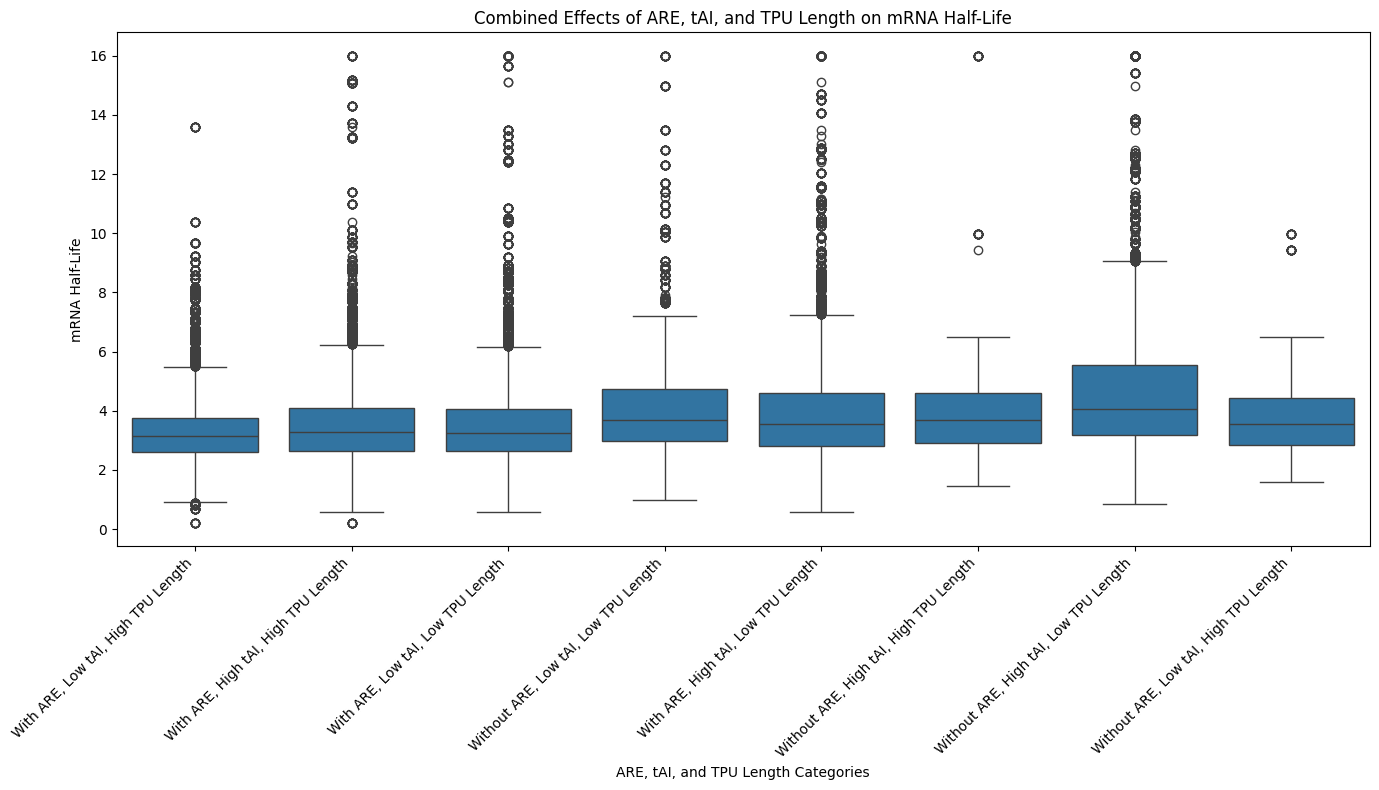

In [18]:
# Import necessary libraries
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# 'cleaned_data' contains columns 'ARE', 'tAI', 'TPU.length', and 'hl' (mRNA half-life)
# Calculate the medians of tAI and TPU length for the cleaned data
tai_median = cleaned_data['tAI'].median()
tpu_median = cleaned_data['TPU.length'].median()

# Categorize ARE, tAI, and TPU length based on the medians
cleaned_data['ARE Status'] = cleaned_data['ARE'].apply(lambda x: 'With ARE' if x > 0 else 'Without ARE')
cleaned_data['tAI Status'] = cleaned_data['tAI'].apply(lambda x: 'High tAI' if x > tai_median else 'Low tAI')
cleaned_data['TPU Length Status'] = cleaned_data['TPU.length'].apply(lambda x: 'High TPU Length' if x > tpu_median else 'Low TPU Length')

# Combine the categories into one column for easier plotting
cleaned_data['Combined'] = cleaned_data['ARE Status'] + ', ' + cleaned_data['tAI Status'] + ', ' + cleaned_data['TPU Length Status']

# Plot the distribution of half-lives based on these combined categories
plt.figure(figsize=(14, 8))
sns.boxplot(x='Combined', y='hl', data=cleaned_data)
plt.xticks(rotation=45, ha='right')
plt.title('Combined Effects of ARE, tAI, and TPU Length on mRNA Half-Life')
plt.xlabel('ARE, tAI, and TPU Length Categories')
plt.ylabel('mRNA Half-Life')
plt.tight_layout()
plt.show()


In [20]:
# Filter data for ARE, tAI, TPU length, and half-life (hl)
cleaned_data_test = data[['ARE', 'tAI', 'TPU.length', 'hl']].dropna()

# Store the columns to test
columns_to_test = ['ARE', 'tAI', 'TPU.length']

# Initialize an empty dictionary to store the Mann-Whitney results
mannwhitney_results = {}

# Loop through the columns and run the Mann-Whitney U test
for col in columns_to_test:
    high_group = cleaned_data_test[cleaned_data_test[col] > cleaned_data_test[col].median()]['hl']
    low_group = cleaned_data_test[cleaned_data_test[col] <= cleaned_data_test[col].median()]['hl']
    
    # Perform the Mann-Whitney U test
    mannwhitney_stat, mannwhitney_p = mannwhitneyu(high_group, low_group)
    
    # Store the results
    mannwhitney_results[col] = (mannwhitney_stat, mannwhitney_p)

# Display the Mann-Whitney results
mannwhitney_results


{'ARE': (np.float64(1082361024.0), np.float64(0.0)),
 'tAI': (np.float64(1652409424.0), np.float64(0.0)),
 'TPU.length': (np.float64(1176567475.0), np.float64(0.0))}

C:\Users\moata\AppData\Local\Temp\ipykernel_6512\3502838102.py:18: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([high_group, low_group], labels=['High ' + col, 'Low ' + col])
C:\Users\moata\AppData\Local\Temp\ipykernel_6512\3502838102.py:18: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([high_group, low_group], labels=['High ' + col, 'Low ' + col])
C:\Users\moata\AppData\Local\Temp\ipykernel_6512\3502838102.py:18: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([high_group, low_group], labels=['High ' + col, 'Low ' + col])


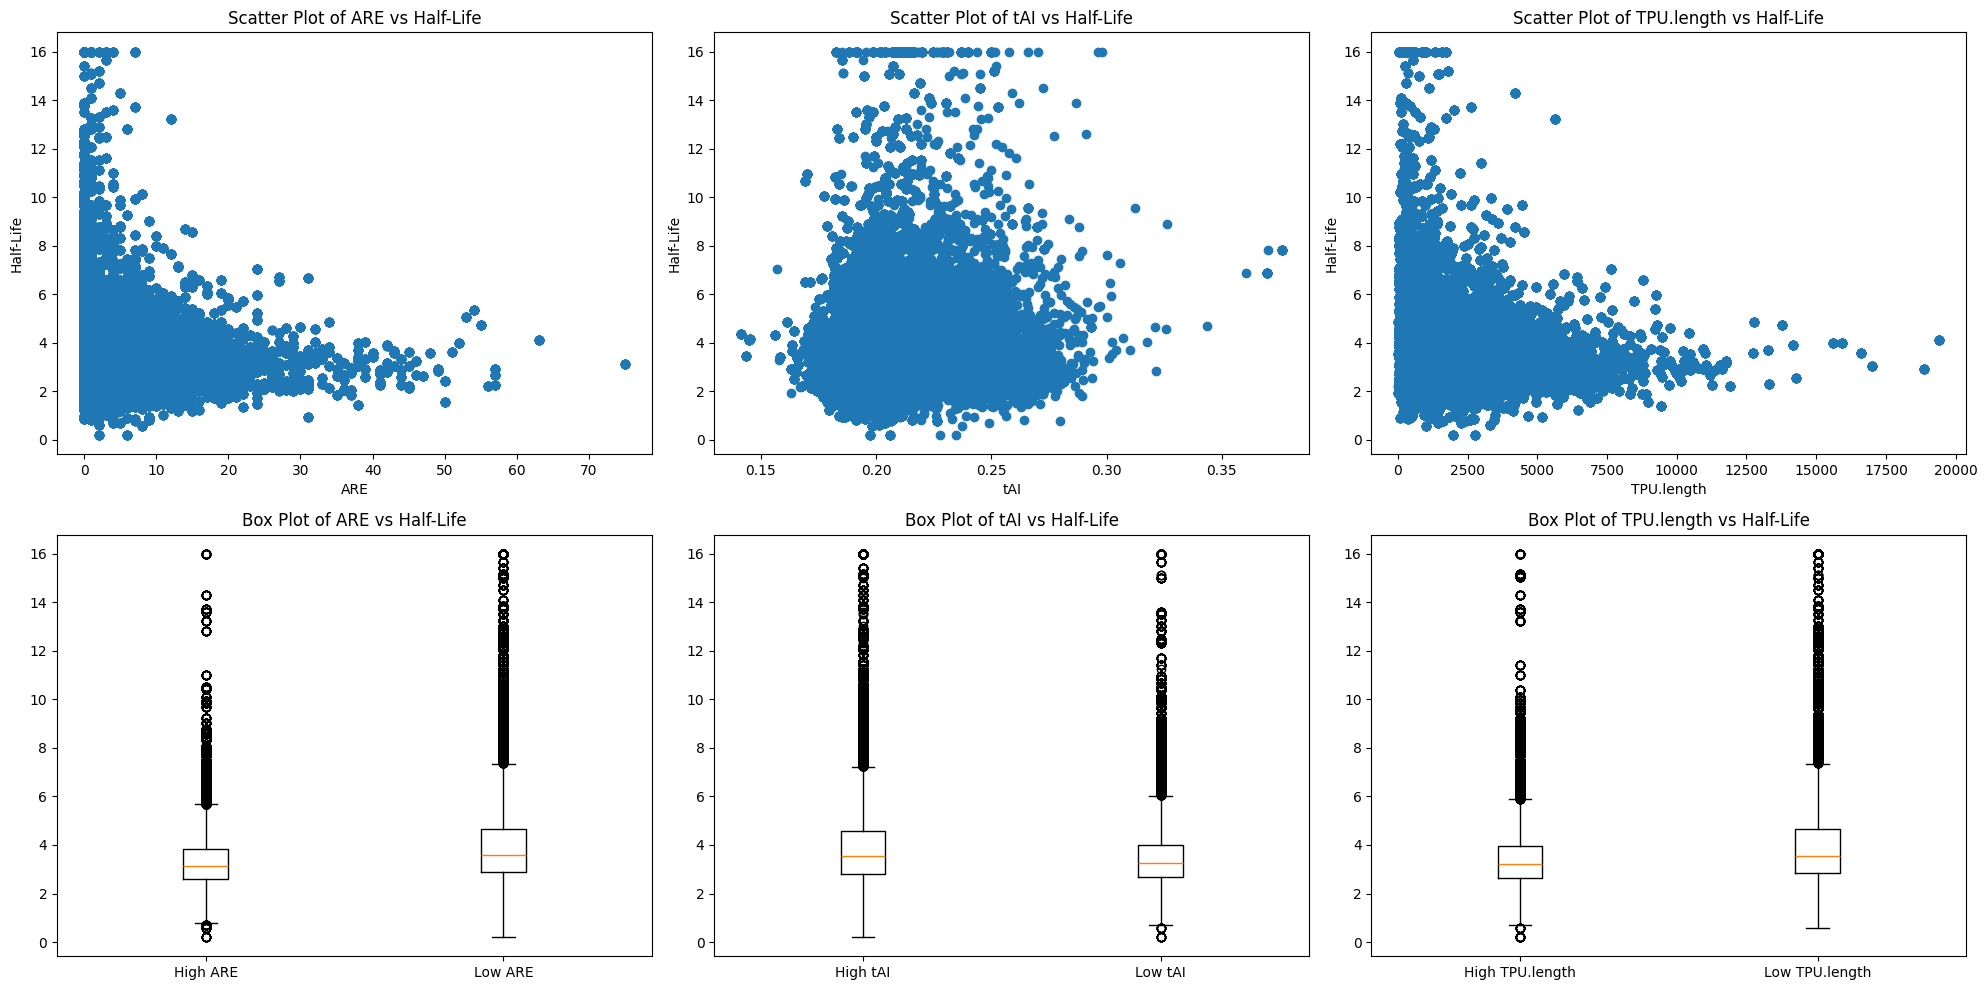

In [21]:


# Visualization: Scatter and Boxplots for each variable

plt.figure(figsize=(20, 10))

# Loop through the columns to generate scatter and boxplots
for idx, col in enumerate(columns_to_test):
    # Scatter plot
    plt.subplot(2, len(columns_to_test), idx + 1)
    plt.scatter(cleaned_data_test[col], cleaned_data_test['hl'])
    plt.title(f'Scatter Plot of {col} vs Half-Life')
    plt.xlabel(col)
    plt.ylabel('Half-Life')

    # Box plot
    plt.subplot(2, len(columns_to_test), idx + 1 + len(columns_to_test))
    high_group = cleaned_data_test[cleaned_data_test[col] > cleaned_data_test[col].median()]['hl']
    low_group = cleaned_data_test[cleaned_data_test[col] <= cleaned_data_test[col].median()]['hl']
    plt.boxplot([high_group, low_group], labels=['High ' + col, 'Low ' + col])
    plt.title(f'Box Plot of {col} vs Half-Life')

# Display the plots
plt.tight_layout()
plt.show()


                 tAI       ARE        hl  TPU.length
tAI         1.000000 -0.238093  0.141154   -0.120072
ARE        -0.238093  1.000000 -0.246442    0.729337
hl          0.141154 -0.246442  1.000000   -0.193403
TPU.length -0.120072  0.729337 -0.193403    1.000000


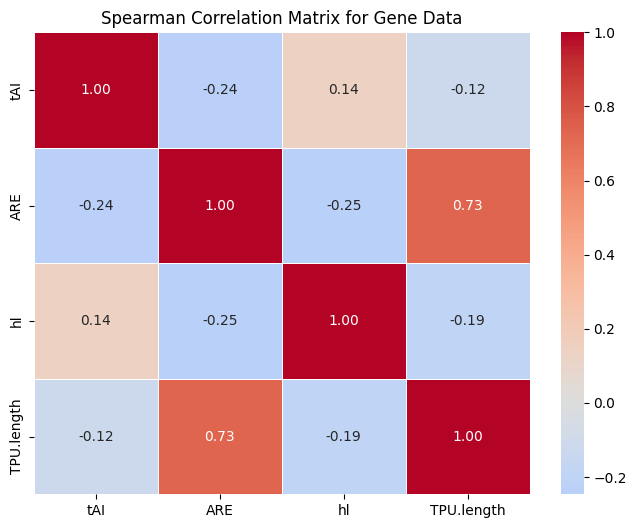

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns
cleaned_data = data[['tAI', 'ARE', 'hl', 'TPU.length']].dropna()
# Running Spearman's rank correlation
spearman_corr = cleaned_data.corr(method='spearman')
print(spearman_corr)
# Set up the matplotlib figure
plt.figure(figsize=(8, 6))
# Plot the heatmap for Spearman correlation matrix
sns.heatmap(spearman_corr, annot=True, cmap='coolwarm', center=0, linewidths=0.5, fmt='.2f')
# Add a title for clarity
plt.title('Spearman Correlation Matrix for Gene Data')
# Show the plot
plt.show()
